## Exploração de aprendizado de máquina

#### O banco de dados foi enriquecido com dados sobre as pessoas!



# Exploração de aprendizado de máquina
**Esse notebook tem como objetivo mostrar a exploração de dados sobre o Titanic, o processo inclui**:
- <a href="#Coleta de dados">Coleta de dados</a>
- <a href="#Entendendo erros e tratando dataset">Entendendo erros e tratando dataset </a>
- <a href="#Tratando e explorando novas features">Tratando e explorando novas features </a>
- <a href="#Explorando o conjunto de dados">Explorando o conjunto de dados</a>
- <a href="#Desenvolvimento de modelos de Machine Learning">Desenvolvimento de modelos de Machine Learning </a>


## Coleta de dados<a name='Coleta de dados' />

### Importando dados

In [1]:
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from IPython.core.pylabtools import figsize

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv('/Users/gabrielfelipepinheirocouto/Documents/arquivos_machine_learning_tcc/data/database_one.csv')
dfo = pd.read_csv('/Users/gabrielfelipepinheirocouto/Documents/arquivos_machine_learning_tcc/data/database_two.csv')

In [2]:
df.head(3)

,Number,Sex,Survived,NameSet,Title,Name,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,male,0,American,Mr.,Gregory Akins,22.0,3,1,0,A/5 21171,7.2500,NaN,S
1,2,male,1,American,Mr.,Matthew Erazo,38.0,1,1,0,PC 17599,71.2833,C85,C
2,3,male,1,American,Mr.,Cornell Banks,26.0,3,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
dfo.head(3)

,Number,StreetAddress,City,State,StateFull,TelephoneNumber,TropicalZodiac,CCNumber,FulColor,Occupation,Company,Centimeters,Kilograms
0,1,1554 Orchard Street,Eden Prairie,MN,Minnesota,952-828-5758,Sagittarius,4.485926e+15,black,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3
1,2,2826 Irving Road,Mansfield,OH,Ohio,740-485-4116,Gemini,5.121207e+15,black,"Production, planning, and expediting clerk",Harold's,185,84.3
2,3,3212 Emma Street,Miami,TX,Texas,806-868-2588,Capricorn,5.149671e+15,dark skinned,Coil finisher,Matrix Architectural Service,165,71.1


In [4]:
len(df)
len(dfo)

2000

#### Explorando tipos de dados 

In [5]:
df.dtypes

Number        int64
Sex          object
Survived      int64
NameSet      object
Title        object
Name         object
Age         float64
Pclass        int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
dfo.dtypes

Number               int64
StreetAddress       object
City                object
State               object
StateFull           object
TelephoneNumber     object
TropicalZodiac      object
CCNumber           float64
FulColor            object
Occupation          object
Company             object
Centimeters          int64
Kilograms          float64
dtype: object

#### Desenvolvendo uma função, a fim de ajustar as colunas e torná-las padronizadas

In [7]:
import re 

def correct_columns(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

#### Chamando função para ajuste nas colunas

In [8]:
df.columns = [correct_columns(col) for col in df.columns]

In [9]:
df.head(3)

,number,sex,survived,nameset,title,name,age,pclass,sibsp,parch,ticket,fare,cabin,embarked
0,1,male,0,American,Mr.,Gregory Akins,22.0,3,1,0,A/5 21171,7.2500,NaN,S
1,2,male,1,American,Mr.,Matthew Erazo,38.0,1,1,0,PC 17599,71.2833,C85,C
2,3,male,1,American,Mr.,Cornell Banks,26.0,3,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
dfo.columns = [correct_columns(col) for col in dfo.columns]

In [11]:
dfo.head(3)

,number,streetaddress,city,state,statefull,telephonenumber,tropicalzodiac,ccnumber,fulcolor,occupation,company,centimeters,kilograms
0,1,1554 Orchard Street,Eden Prairie,MN,Minnesota,952-828-5758,Sagittarius,4.485926e+15,black,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3
1,2,2826 Irving Road,Mansfield,OH,Ohio,740-485-4116,Gemini,5.121207e+15,black,"Production, planning, and expediting clerk",Harold's,185,84.3
2,3,3212 Emma Street,Miami,TX,Texas,806-868-2588,Capricorn,5.149671e+15,dark skinned,Coil finisher,Matrix Architectural Service,165,71.1


#### Validaçao e join entre os datasets

In [12]:
len(dfo)

2000

In [13]:
len(df)

2000

In [14]:
union = df.join(dfo.set_index('number'), on='number', how='inner')
df = union 

In [15]:
df.head(3) 

,number,sex,survived,nameset,title,name,age,pclass,sibsp,parch,...,state,statefull,telephonenumber,tropicalzodiac,ccnumber,fulcolor,occupation,company,centimeters,kilograms
0,1,male,0,American,Mr.,Gregory Akins,22.0,3,1,0,...,MN,Minnesota,952-828-5758,Sagittarius,4.485926e+15,black,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3
1,2,male,1,American,Mr.,Matthew Erazo,38.0,1,1,0,...,OH,Ohio,740-485-4116,Gemini,5.121207e+15,black,"Production, planning, and expediting clerk",Harold's,185,84.3
2,3,male,1,American,Mr.,Cornell Banks,26.0,3,0,0,...,TX,Texas,806-868-2588,Capricorn,5.149671e+15,dark skinned,Coil finisher,Matrix Architectural Service,165,71.1


## Entendendo erros e tratando dataset <a name='Entendendo erros e tratando dataset' />

#### Explorando na colunas do dataset


In [16]:
df.head(4).isnull

<bound method DataFrame.isnull of    number   sex  survived   nameset title           name   age  pclass  sibsp  \
0       1  male         0  American   Mr.  Gregory Akins  22.0       3      1   
1       2  male         1  American   Mr.  Matthew Erazo  38.0       1      1   
2       3  male         1  American   Mr.  Cornell Banks  26.0       3      0   
3       4  male         1  American   Mr.    Sonny Pando  35.0       1      1   

   parch  ... state  statefull telephonenumber tropicalzodiac      ccnumber  \
0      0  ...    MN  Minnesota    952-828-5758    Sagittarius  4.485926e+15   
1      0  ...    OH       Ohio    740-485-4116         Gemini  5.121207e+15   
2      0  ...    TX      Texas    806-868-2588      Capricorn  5.149671e+15   
3      0  ...    FL    Florida    561-239-9393         Cancer  5.560293e+15   

       fulcolor                                        occupation  \
0         black  Decommissioning and decontamination (D&D) worker   
1         black        Pro

In [17]:
for field in df.columns:
    print(field, 'NaN:', df[field].isnull().sum())

number NaN: 0
sex NaN: 0
survived NaN: 0
nameset NaN: 0
title NaN: 0
name NaN: 0
age NaN: 399
pclass NaN: 0
sibsp NaN: 0
parch NaN: 0
ticket NaN: 0
fare NaN: 0
cabin NaN: 1538
embarked NaN: 4
streetaddress NaN: 0
city NaN: 0
state NaN: 0
statefull NaN: 1
telephonenumber NaN: 0
tropicalzodiac NaN: 0
ccnumber NaN: 0
fulcolor NaN: 0
occupation NaN: 0
company NaN: 2
centimeters NaN: 0
kilograms NaN: 0


#### Tratando os NaN

In [18]:
for dataset in [df]:
    dataset.loc[dataset['embarked'].isnull(), 'embarked'] = 0

#### Entendendo que os dados de cabine não são relavante para nosso modelo, portando iremos eliminar 

In [19]:
df = df.drop(['cabin'], axis=1)

#### Como temos apenas o 2 sexos em nossa base, iremos ajustar para 1 e o outro 0 

In [20]:
df['sex'] = df['sex'].map( {'female': 1, 'male': 0} ).astype(int)

#### Entendendo os dados de pessoas com erros na idade 

In [21]:
df.loc[df['age'].isnull()][(df['sibsp'] > 0) & (df['parch'] > 0)]

/var/folders/tg/c6ljdbxs413fnh6q_jp7r6380000gp/T/ipykernel_29445/3565042670.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df['age'].isnull()][(df['sibsp'] > 0) & (df['parch'] > 0)]


,number,sex,survived,nameset,title,name,age,pclass,sibsp,parch,...,state,statefull,telephonenumber,tropicalzodiac,ccnumber,fulcolor,occupation,company,centimeters,kilograms
65,66,1,1,American,Mrs.,Alisa Steinhoff,NaN,3,1,1,...,KS,Kansas,620-792-4328,Taurus,5.466272e+15,dark skinned,Marketing research analyst,Baltimore Markets,166,99.6
128,129,1,1,American,Ms.,Frances Christopher,NaN,3,1,1,...,NY,New York,315-681-7323,Cancer,4.539171e+15,dark skinned,Obstetrician,Builderama,163,85.1
159,160,1,0,American,Mrs.,Diane Leblanc,NaN,3,8,2,...,TX,Texas,972-607-1199,Taurus,5.253551e+15,black,Data processor,Lindsley's Lumber,168,70.8
176,177,1,0,American,Mrs.,Melissa Harris,NaN,3,3,1,...,CA,California,619-574-3266,Taurus,4.929838e+15,black,Accountant,Liberal,163,72.1
180,181,0,0,American,Mr.,Jessie Sanchez,NaN,3,8,2,...,IL,Illinois,847-222-7198,Leo,4.916485e+15,black,Vocational education teacher,Weenie Beenie,187,105.9
201,202,1,0,American,Mrs.,Rachel Sherrick,NaN,3,8,2,...,WA,Washington,360-735-9933,Scorpio,5.144030e+15,white,Orthopedic nurse,Official All Star Café,167,59.9
229,230,1,0,American,Mrs.,Virginia Winters,NaN,3,3,1,...,VA,Virginia,804-399-7500,Aries,4.556976e+15,dark skinned,Relay technician,Plan Smart Partner,160,59.0
324,325,0,0,American,Mr.,Jeffrey Powell,NaN,3,8,2,...,MS,Mississippi,662-862-9505,Virgo,4.485576e+15,black,Osteopathic surgeon,Oranges Records & Tapes,186,105.1
409,410,0,0,American,Mr.,Fred Marsh,NaN,3,3,1,...,CA,California,408-441-4033,Capricorn,4.716352e+15,white,Dipper,Megatronic Plus,171,71.4
485,486,0,0,American,Mr.,Sam Palmer,NaN,3,3,1,...,WI,Wisconsin,920-224-1969,Aries,4.556949e+15,dark skinned,Support staff specialist,Suadela Investment,183,76.6


#### Iremos pegar a média de idade de passageiros, com caracteristicas similares a quem está com NaN em idade, tudo isso para criação do nosso For

In [22]:
guess_ages = np.zeros((2,3))

for dataset in [df]:
    for sex in range(0, 2):
        for pclass in range(0, 3):
            guess_df = dataset[(dataset['sex'] == sex) & (dataset['pclass'] == pclass + 1)]['age'].dropna()

            age_guess = guess_df.median()
            print('sex', sex, 'pclass', pclass)
            print(len(guess_df), age_guess)

            # Converte para a idade mais proxima (para nao ficar 0.4 ou 0.333)
            guess_ages[sex, pclass] = int( age_guess / 0.5 + 0.5 ) * 0.5

    for sex in range(0, 2):
        for pclass in range(0, 3):
            dataset.loc[ (dataset.age.isnull()) & (dataset.sex == sex) & (dataset.pclass == pclass + 1), 'age'] = guess_ages[sex,pclass]

    dataset['age'] = dataset['age'].astype(int)

sex 0 pclass 0
214 31.0
sex 0 pclass 1
167 29.0
sex 0 pclass 2
434 26.0
sex 1 pclass 0
180 34.0
sex 1 pclass 1
200 29.0
sex 1 pclass 2
406 27.0


#### Validando se temos alguma linha NaN

In [23]:
df.loc[df['age'].isnull()]

,number,sex,survived,nameset,title,name,age,pclass,sibsp,parch,...,state,statefull,telephonenumber,tropicalzodiac,ccnumber,fulcolor,occupation,company,centimeters,kilograms


In [24]:
print('df:', len(df.loc[df['age'].isnull()]))

df: 0


In [25]:
for field in df.columns:
    print(field, 'NaN:', df[field].isnull().sum())

number NaN: 0
sex NaN: 0
survived NaN: 0
nameset NaN: 0
title NaN: 0
name NaN: 0
age NaN: 0
pclass NaN: 0
sibsp NaN: 0
parch NaN: 0
ticket NaN: 0
fare NaN: 0
embarked NaN: 0
streetaddress NaN: 0
city NaN: 0
state NaN: 0
statefull NaN: 1
telephonenumber NaN: 0
tropicalzodiac NaN: 0
ccnumber NaN: 0
fulcolor NaN: 0
occupation NaN: 0
company NaN: 2
centimeters NaN: 0
kilograms NaN: 0


#### Notamos que as colunas statefull e company tem linhas NaN, como se trata de uma linha, iremos exclui-las da base

In [26]:
len(df)

2000

In [27]:
df = df.dropna()

In [28]:
len(df)

1997

In [29]:
for field in df.columns:
    print(field, 'NaN:', df[field].isnull().sum())

number NaN: 0
sex NaN: 0
survived NaN: 0
nameset NaN: 0
title NaN: 0
name NaN: 0
age NaN: 0
pclass NaN: 0
sibsp NaN: 0
parch NaN: 0
ticket NaN: 0
fare NaN: 0
embarked NaN: 0
streetaddress NaN: 0
city NaN: 0
state NaN: 0
statefull NaN: 0
telephonenumber NaN: 0
tropicalzodiac NaN: 0
ccnumber NaN: 0
fulcolor NaN: 0
occupation NaN: 0
company NaN: 0
centimeters NaN: 0
kilograms NaN: 0


In [30]:
df

,number,sex,survived,nameset,title,name,age,pclass,sibsp,parch,...,state,statefull,telephonenumber,tropicalzodiac,ccnumber,fulcolor,occupation,company,centimeters,kilograms
0,1,0,0,American,Mr.,Gregory Akins,22,3,1,0,...,MN,Minnesota,952-828-5758,Sagittarius,4.485926e+15,black,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3
1,2,0,1,American,Mr.,Matthew Erazo,38,1,1,0,...,OH,Ohio,740-485-4116,Gemini,5.121207e+15,black,"Production, planning, and expediting clerk",Harold's,185,84.3
2,3,0,1,American,Mr.,Cornell Banks,26,3,0,0,...,TX,Texas,806-868-2588,Capricorn,5.149671e+15,dark skinned,Coil finisher,Matrix Architectural Service,165,71.1
3,4,0,1,American,Mr.,Sonny Pando,35,1,1,0,...,FL,Florida,561-239-9393,Cancer,5.560293e+15,black,Marketing coordinator,Micro Design,185,98.6
4,5,1,0,American,Dr.,Marie Dawson,35,3,0,0,...,PA,Pennsylvania,267-481-6304,Aries,5.466110e+15,black,Lease driver,Fragrant Flower Lawn Services,163,52.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,0,American,Mr.,Francis Cross,71,1,0,0,...,IL,Illinois,224-655-6481,Libra,4.532325e+15,dark skinned,Merchant marine sailor,Solution Answers,178,68.7
1996,1997,1,1,American,Mrs.,Claire Bear,23,2,1,2,...,NY,New York,917-464-5238,Gemini,5.531826e+15,black,Furniture finisher,Listenin' Booth,166,64.0
1997,1998,1,0,American,Mrs.,Nancy Norris,41,3,0,0,...,TN,Tennessee,731-393-7947,Gemini,4.716393e+15,dark skinned,Human resources analyst,Sportmart,172,54.8
1998,1999,0,1,American,Mr.,Steven Stevenson,26,3,0,0,...,NJ,New Jersey,908-644-8422,Leo,4.929315e+15,black,Industrial designer,Virgin Megastores,170,65.3


## Tratando e explorando novas features <a name='Tratando e explorando novas features' />


#### Tratando e explorando novas features, iremos transformar dados categóricos em números

In [31]:
pd.crosstab(df["title"], df['sex'])

sex,0,1
title,,
Dr.,33,29
Mr.,975,0
Mrs.,0,454
Ms.,0,506


#### Transformando a coluna sex em números 

In [32]:
title_mapping = {"Dr.": 1, "Mr.": 2, "Mrs.": 3, "Ms.": 4}

for dataset in [df]:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)

In [33]:
pd.crosstab(df['title'], df['sex'])

sex,0,1
title,,
1,33,29
2,975,0
3,0,454
4,0,506


In [34]:
df.head(3)

,number,sex,survived,nameset,title,name,age,pclass,sibsp,parch,...,state,statefull,telephonenumber,tropicalzodiac,ccnumber,fulcolor,occupation,company,centimeters,kilograms
0,1,0,0,American,2,Gregory Akins,22,3,1,0,...,MN,Minnesota,952-828-5758,Sagittarius,4.485926e+15,black,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3
1,2,0,1,American,2,Matthew Erazo,38,1,1,0,...,OH,Ohio,740-485-4116,Gemini,5.121207e+15,black,"Production, planning, and expediting clerk",Harold's,185,84.3
2,3,0,1,American,2,Cornell Banks,26,3,0,0,...,TX,Texas,806-868-2588,Capricorn,5.149671e+15,dark skinned,Coil finisher,Matrix Architectural Service,165,71.1


#### Aqui separamos casos que a pessoa está sozinho ou não, e o tamanho da famila 

In [35]:
df['familysize'] = df['sibsp'] + df['parch'] + 1

df['Isalone'] = 0

df.loc[df['familysize'] == 1, 'Isalone'] = 1

In [36]:
df.head(3)

,number,sex,survived,nameset,title,name,age,pclass,sibsp,parch,...,telephonenumber,tropicalzodiac,ccnumber,fulcolor,occupation,company,centimeters,kilograms,familysize,Isalone
0,1,0,0,American,2,Gregory Akins,22,3,1,0,...,952-828-5758,Sagittarius,4.485926e+15,black,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3,2,0
1,2,0,1,American,2,Matthew Erazo,38,1,1,0,...,740-485-4116,Gemini,5.121207e+15,black,"Production, planning, and expediting clerk",Harold's,185,84.3,2,0
2,3,0,1,American,2,Cornell Banks,26,3,0,0,...,806-868-2588,Capricorn,5.149671e+15,dark skinned,Coil finisher,Matrix Architectural Service,165,71.1,1,1


#### Explorando mais dados para ver sua relevância no modelo, e exclusão de colunas sem necessidade 

In [37]:
np.unique(df["nameset"])

array(['American'], dtype=object)

In [38]:
df = df.drop(['nameset'], axis=1)

In [39]:
np.unique(df["telephonenumber"])

array(['201-288-1555', '201-319-7369', '201-370-0851', ...,
       '989-769-4784', '989-894-3207', '989-942-5911'], dtype=object)

In [40]:
df = df.drop(['telephonenumber'], axis=1)

In [41]:
np.unique(df["tropicalzodiac"])

array(['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo',
       'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo'],
      dtype=object)

In [42]:
df = df.drop(['tropicalzodiac'], axis=1)

In [43]:
df.head(3)

,number,sex,survived,title,name,age,pclass,sibsp,parch,ticket,...,state,statefull,ccnumber,fulcolor,occupation,company,centimeters,kilograms,familysize,Isalone
0,1,0,0,2,Gregory Akins,22,3,1,0,A/5 21171,...,MN,Minnesota,4.485926e+15,black,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3,2,0
1,2,0,1,2,Matthew Erazo,38,1,1,0,PC 17599,...,OH,Ohio,5.121207e+15,black,"Production, planning, and expediting clerk",Harold's,185,84.3,2,0
2,3,0,1,2,Cornell Banks,26,3,0,0,STON/O2. 3101282,...,TX,Texas,5.149671e+15,dark skinned,Coil finisher,Matrix Architectural Service,165,71.1,1,1


In [44]:
np.unique(df["fulcolor"])

array(['black', 'dark skinned', 'white'], dtype=object)

In [45]:
title_mapping = {"black": 1, "dark skinned": 2, "white": 3}

for dataset in [df]:
    dataset['fulcolor'] = dataset['fulcolor'].map(title_mapping)
    dataset['fulcolor'] = dataset['fulcolor'].fillna("")

In [46]:
np.unique(df["fulcolor"])

array([1, 2, 3])

In [47]:
df.head(3)

,number,sex,survived,title,name,age,pclass,sibsp,parch,ticket,...,state,statefull,ccnumber,fulcolor,occupation,company,centimeters,kilograms,familysize,Isalone
0,1,0,0,2,Gregory Akins,22,3,1,0,A/5 21171,...,MN,Minnesota,4.485926e+15,1,Decommissioning and decontamination (D&D) worker,Monmax,188,68.3,2,0
1,2,0,1,2,Matthew Erazo,38,1,1,0,PC 17599,...,OH,Ohio,5.121207e+15,1,"Production, planning, and expediting clerk",Harold's,185,84.3,2,0
2,3,0,1,2,Cornell Banks,26,3,0,0,STON/O2. 3101282,...,TX,Texas,5.149671e+15,2,Coil finisher,Matrix Architectural Service,165,71.1,1,1


#### Observamos mais outros dados que não precisaremos, portanto iremos excluilos e deixar nosso dados mais aderentes ao modelo

In [48]:
df = df.drop(['ticket',"state","statefull","ccnumber","occupation","company","city","streetaddress","name", "centimeters","kilograms","number","title"], axis=1)

In [49]:
df.head(3)

,sex,survived,age,pclass,sibsp,parch,fare,embarked,fulcolor,familysize,Isalone
0,0,0,22,3,1,0,7.2500,S,1,2,0
1,0,1,38,1,1,0,71.2833,C,1,2,0
2,0,1,26,3,0,0,7.9250,S,2,1,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         1997 non-null   int64  
 1   survived    1997 non-null   int64  
 2   age         1997 non-null   int64  
 3   pclass      1997 non-null   int64  
 4   sibsp       1997 non-null   int64  
 5   parch       1997 non-null   int64  
 6   fare        1997 non-null   float64
 7   embarked    1997 non-null   object 
 8   fulcolor    1997 non-null   int64  
 9   familysize  1997 non-null   int64  
 10  Isalone     1997 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 187.2+ KB


In [51]:
df['fare'].describe()

count    1997.000000
mean       31.504249
std        48.000765
min         0.000000
25%         7.895800
50%        14.454200
75%        30.695800
max       512.329200
Name: fare, dtype: float64

#### Ja excluimos as colunas que não devem fazer parte do nosso modelo, agora vamos continuar a trasformação de dados

In [52]:
for dataset in [df]:
    dataset['fareCat'] = 0
    dataset.loc[dataset.fare < 7.91, 'fareCat'] = 1
    dataset.loc[(dataset.fare >= 7.91) & (dataset.fare <= 14.45), 'fareCat'] = 2
    dataset.loc[(dataset.fare >= 14.45) & (dataset.fare <= 31), 'fareCat'] = 3
    dataset.loc[dataset.fare > 31, 'fareCat'] = 4

df.head(3)

,sex,survived,age,pclass,sibsp,parch,fare,embarked,fulcolor,familysize,Isalone,fareCat
0,0,0,22,3,1,0,7.2500,S,1,2,0,1
1,0,1,38,1,1,0,71.2833,C,1,2,0,4
2,0,1,26,3,0,0,7.9250,S,2,1,1,2


In [53]:
df.embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [54]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3, 0: 0}
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].map(embarked_mapping)
    
df.head(3)

,sex,survived,age,pclass,sibsp,parch,fare,embarked,fulcolor,familysize,Isalone,fareCat
0,0,0,22,3,1,0,7.2500,1,1,2,0,1
1,0,1,38,1,1,0,71.2833,2,1,2,0,4
2,0,1,26,3,0,0,7.9250,1,2,1,1,2


## Explorando o conjunto de dados <a name='Explorando o conjunto de dados' />
#### explorando e analisando os dados

In [55]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style ('whitegrid')
%matplotlib inline

#### Percentual de sobreviventes

Survival percentage: 0.38407611417125687


<AxesSubplot:xlabel='survived', ylabel='count'>

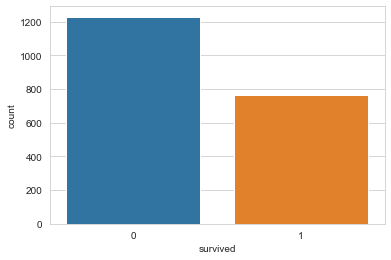

In [56]:
print('Survival percentage:', len(df[df.survived == 1]) / len(df))
sns.countplot(x="survived", data=df)

#### Porcentagem de sobrevivência de pessoas que estavam na primeira classe

Survival percentage: 0.1472208312468703


<AxesSubplot:xlabel='survived', ylabel='count'>

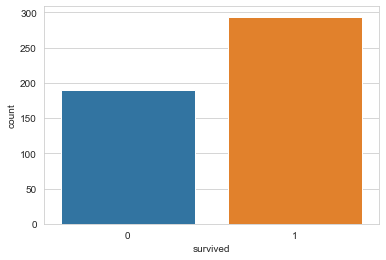

In [57]:
print('Survival percentage:', len(df[(df.pclass == 1) & (df.survived == 1 )]) / len(df))
sns.countplot(x="survived", data=df[df.pclass == 1])


#### Porcentagem de sobrevivência de pessoas que estavam na segunda classe

Survival percentage: 0.09564346519779669


<AxesSubplot:xlabel='survived', ylabel='count'>

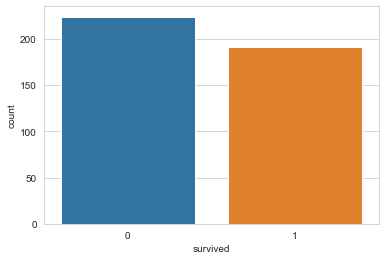

In [58]:
print('Survival percentage:', len(df[(df.pclass == 2) & (df.survived == 1 )]) / len(df))
sns.countplot(x="survived", data=df[df.pclass == 2])

#### Porcentagem de sobrevivência de pessoas que estavam na terceira classe

Survival percentage: 0.1412118177265899


<AxesSubplot:xlabel='survived', ylabel='count'>

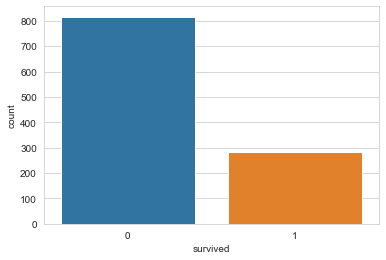

In [59]:
print('Survival percentage:', len(df[(df.pclass == 3) & (df.survived == 1 )]) / len(df))
sns.countplot(x="survived", data=df[df.pclass == 3])

#### Entendendo se mulheres de primeira classe sobreviveram 

0.07060590886329494


<AxesSubplot:xlabel='survived', ylabel='count'>

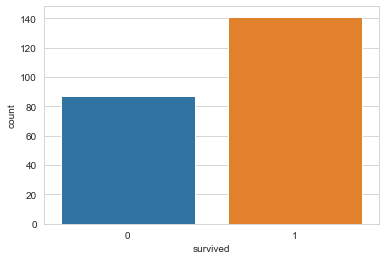

In [60]:
print(len(df[(df.pclass == 1) & (df.sex == 1 ) & (df.survived == 1)]) / len(df))
sns.countplot(x="survived", data=df[(df.pclass == 1) & (df.sex == 1 )])

#### Entendendo por que algumas das mulheres de primeira classe morreram

In [61]:
df[(df.sex == 1) & (df.survived == 0) & (df.pclass == 1)]

,sex,survived,age,pclass,sibsp,parch,fare,embarked,fulcolor,familysize,Isalone,fareCat
34,1,0,28,1,1,0,82.1708,2,2,2,0,4
35,1,0,42,1,1,0,52.0000,1,3,2,0,4
64,1,0,34,1,0,0,27.7208,2,2,1,1,3
102,1,0,21,1,0,1,77.2875,1,3,2,0,4
124,1,0,54,1,0,1,77.2875,1,3,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1942,1,0,25,1,1,1,7.8958,1,3,3,0,1
1943,1,0,41,1,0,0,10.5167,3,1,1,1,2
1969,1,0,20,1,0,0,13.0000,1,1,1,1,2
1983,1,0,34,1,0,0,7.8958,1,3,1,1,1


#### Matrix de correlação 

In [62]:
df.head(3)

,sex,survived,age,pclass,sibsp,parch,fare,embarked,fulcolor,familysize,Isalone,fareCat
0,0,0,22,3,1,0,7.2500,1,1,2,0,1
1,0,1,38,1,1,0,71.2833,2,1,2,0,4
2,0,1,26,3,0,0,7.9250,1,2,1,1,2


In [63]:
pt = df.drop(['sibsp',"parch","embarked","fulcolor"], axis=1)

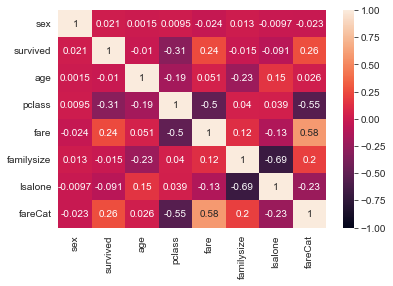

In [64]:
sns.heatmap(pt.corr(), annot=True, vmin=-1, vmax=1);

In [65]:
df

,sex,survived,age,pclass,sibsp,parch,fare,embarked,fulcolor,familysize,Isalone,fareCat
0,0,0,22,3,1,0,7.2500,1,1,2,0,1
1,0,1,38,1,1,0,71.2833,2,1,2,0,4
2,0,1,26,3,0,0,7.9250,1,2,1,1,2
3,0,1,35,1,1,0,53.1000,1,1,2,0,4
4,1,0,35,3,0,0,8.0500,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,71,1,0,0,7.7500,1,2,1,1,1
1996,1,1,23,2,1,2,30.0000,1,1,4,0,3
1997,1,0,41,3,0,0,20.0000,1,2,1,1,3
1998,0,1,26,3,0,0,45.0000,2,1,1,1,4


## Desenvolvimento de modelos de Machine Learning  <a name='Desenvolvimento de modelos de Machine Learning' />


#### Explorando os dados já tratados e prontos para serem usados e separando nossa base de teste e treinamento

In [66]:
msk = np.random.rand(len(df)) < 0.7 
train = df[msk]
test = df[~msk]

In [67]:
X_train = train.drop(["survived"], axis=1)
Y_train = train["survived"]
X_test  = test.drop("survived", axis=1)
Y_test  = test["survived"]

#### Modelos de Machine Learning

In [68]:
modelos = [LogisticRegression(solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=42),
           DecisionTreeClassifier(random_state=42)]

#### Validação cruzada

In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [70]:
mean=[]
std=[]
for model in modelos:
  result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
  mean.append(result)
  std.append(result)

/Users/gabrielfelipepinheirocouto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/gabrielfelipepinheirocouto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/gabrielfelipepinheirocouto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

([], [])

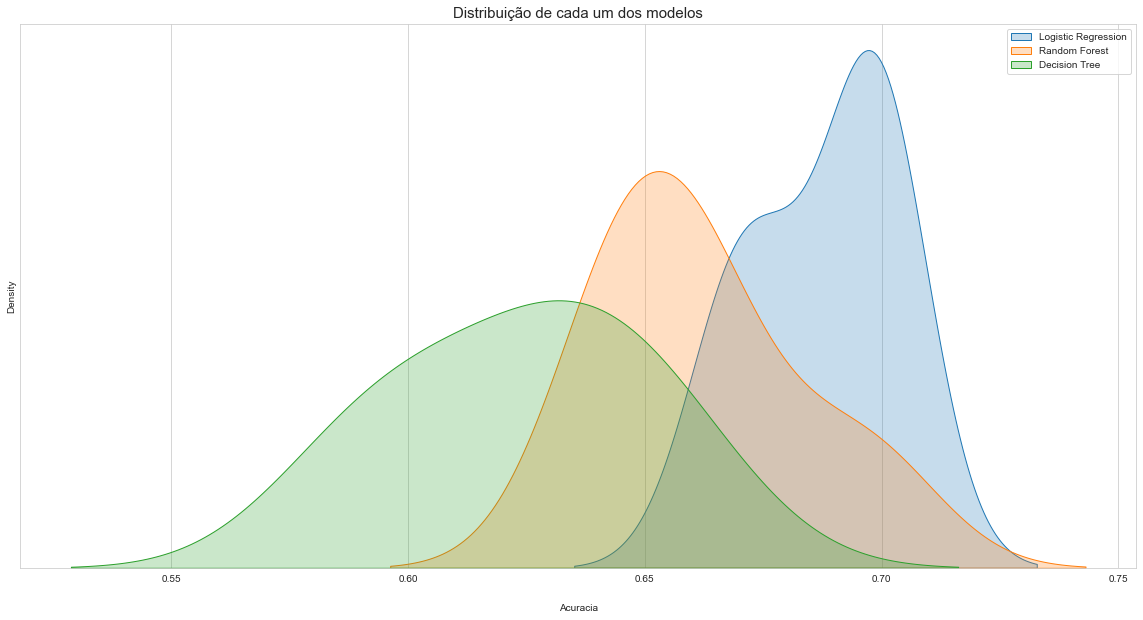

In [71]:
classificadores = ['Logistic Regression', 'Random Forest', 'Decision Tree']

plt.figure(figsize=(20, 10))
for i in range(len(mean)):
  sns.distplot(mean[i], hist=False, kde_kws={"shade":True})

plt.title("Distribuição de cada um dos modelos", fontsize=15)
plt.legend(classificadores)
plt.xlabel("Acuracia", labelpad=20)
plt.yticks([])

In [72]:
rf_clf = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression(solver='liblinear')

rf_clf.fit(X_train, Y_train)
dt_clf.fit(X_train, Y_train)
lr_clf.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [73]:
rf_prob = rf_clf.predict_proba(X_test)
dt_prob = dt_clf.predict_proba(X_test)
lr_prob = lr_clf.predict_proba(X_test)

rf_preds = np.argmax(rf_prob, axis=1)
dt_preds = np.argmax(dt_prob, axis=1)
lr_preds = np.argmax(lr_prob, axis=1)

In [74]:
cm1 = metrics.confusion_matrix(Y_test, rf_preds)
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

cm2 = metrics.confusion_matrix(Y_test, dt_preds)
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

cm3 = metrics.confusion_matrix(Y_test, lr_preds)
cm3 = cm3.astype('float') / cm3.sum(axis=1)[:, np.newaxis]

[Text(0.5, 25.0, 'previsão'), Text(1431.6470588235295, 0.5, 'Valor real')]

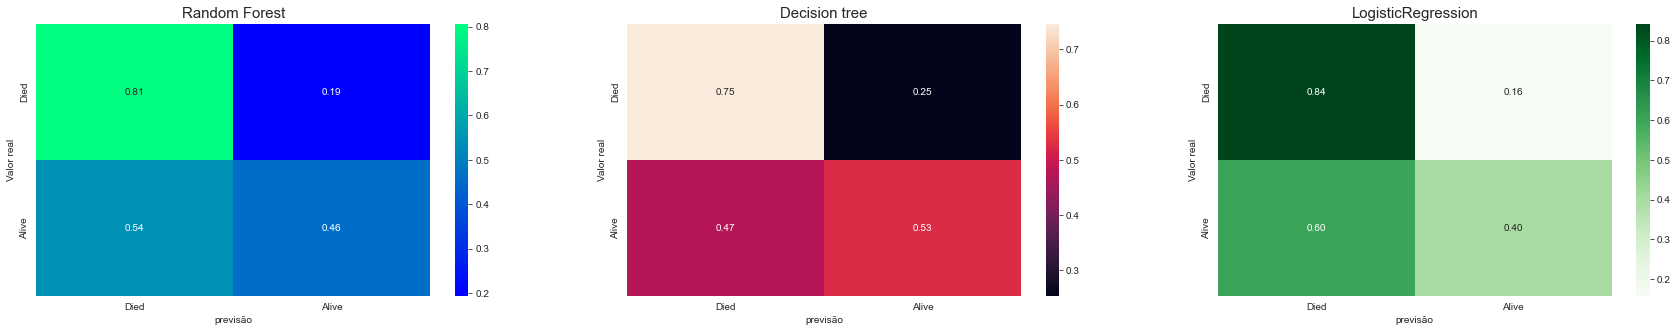

In [77]:
classes=["Died", "Alive"]
f, ax = plt.subplots(1, 3,  figsize=(30, 5))

ax[0].set_title("Random Forest", fontsize=15.)
sns.heatmap(pd.DataFrame(cm1, index=classes, columns=classes),
            cmap='winter', annot=True, fmt='.2f', ax=ax[0]).set(xlabel="previsão", ylabel="Valor real")

ax[1].set_title("Decision tree", fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classes, columns=classes),
             annot=True, fmt='.2f', ax=ax[1]).set(xlabel="previsão", ylabel="Valor real")

ax[2].set_title("LogisticRegression", fontsize=15.)
sns.heatmap(pd.DataFrame(cm3, index=classes, columns=classes),
            cmap='Greens', annot=True, fmt='.2f', ax=ax[2]).set(xlabel="previsão", ylabel="Valor real")